In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf

In [2]:
y, sr = librosa.load('Tears_of_a_witch_SFA.wav',sr=None)
print(y.shape, sr)

(6849536,) 44100


In [3]:
freq_w = 3
octave = 7
hop_len = 512
cqt = librosa.cqt(
    y = y,
    sr = sr,
    hop_length = hop_len,
    n_bins = 12 * octave * freq_w,
    bins_per_octave = 12 * freq_w
)
print(cqt.shape)

(252, 13379)


In [4]:
cqt_db = librosa.amplitude_to_db(
    S= np.abs(cqt),
    ref= np.max,
)
print(cqt_db.shape)
print(cqt_db.min(),cqt_db.max())

(252, 13379)
-80.0 0.0


In [5]:
# cqt note y_ticks
notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
y_ticks = np.arange(0,12*freq_w*octave,freq_w)
y_list=[]

for o in range(octave):
    for i in range(12):
        y_list.append(notes[i]+'%d'%(o+1))

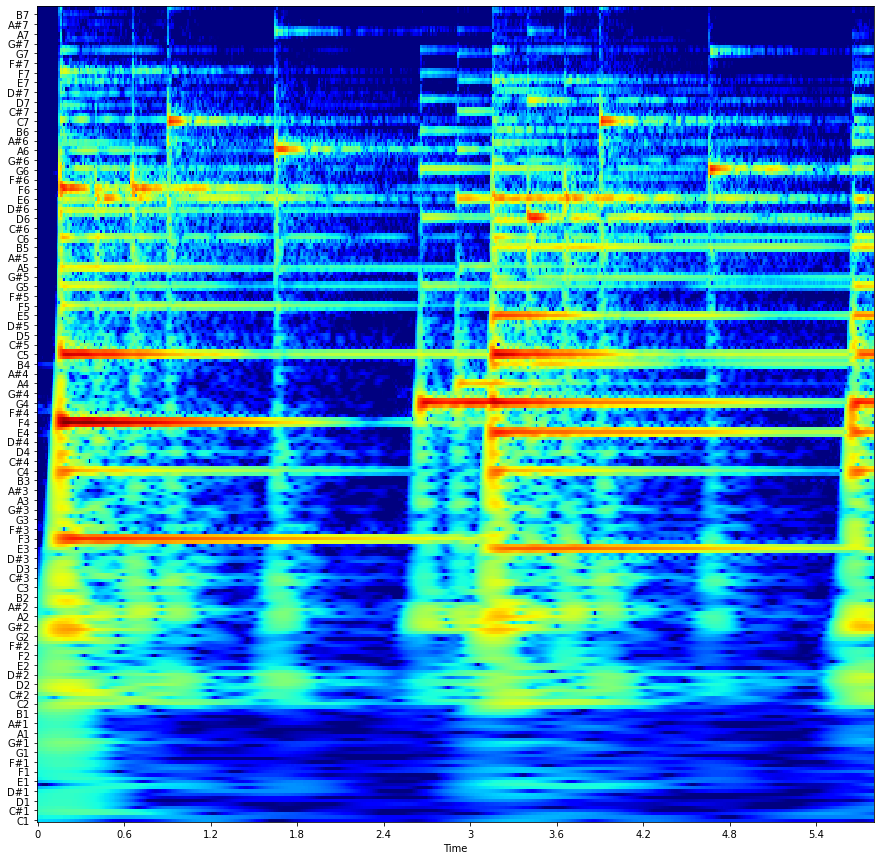

In [6]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
img = librosa.display.specshow(
    data= cqt_db[:,:500],
    x_axis= "time",
    sr= sr,
    hop_length= hop_len,
    bins_per_octave= 12*freq_w,
    ax= ax,
    cmap= 'jet'
)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_list)
plt.show()



# 역변환

In [7]:
icqt_amp = librosa.db_to_amplitude(cqt_db)
print(icqt_amp.shape)

(252, 13379)


In [8]:
icqt = librosa.icqt(icqt_amp, sr= sr, hop_length= hop_len, bins_per_octave= 12*freq_w)
print(icqt.shape)

(6849536,)


In [9]:
sf.write('icqt_output.wav', icqt, sr, subtype="PCM_24")

In [10]:
sf.write('y_output.wav', y, sr, subtype="PCM_24")

In [11]:
cqt_i = librosa.icqt(cqt, sr= sr, hop_length= hop_len, bins_per_octave= 12*freq_w)
sf.write('cqt_i_output.wav', cqt_i, sr, subtype="PCM_24")